In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

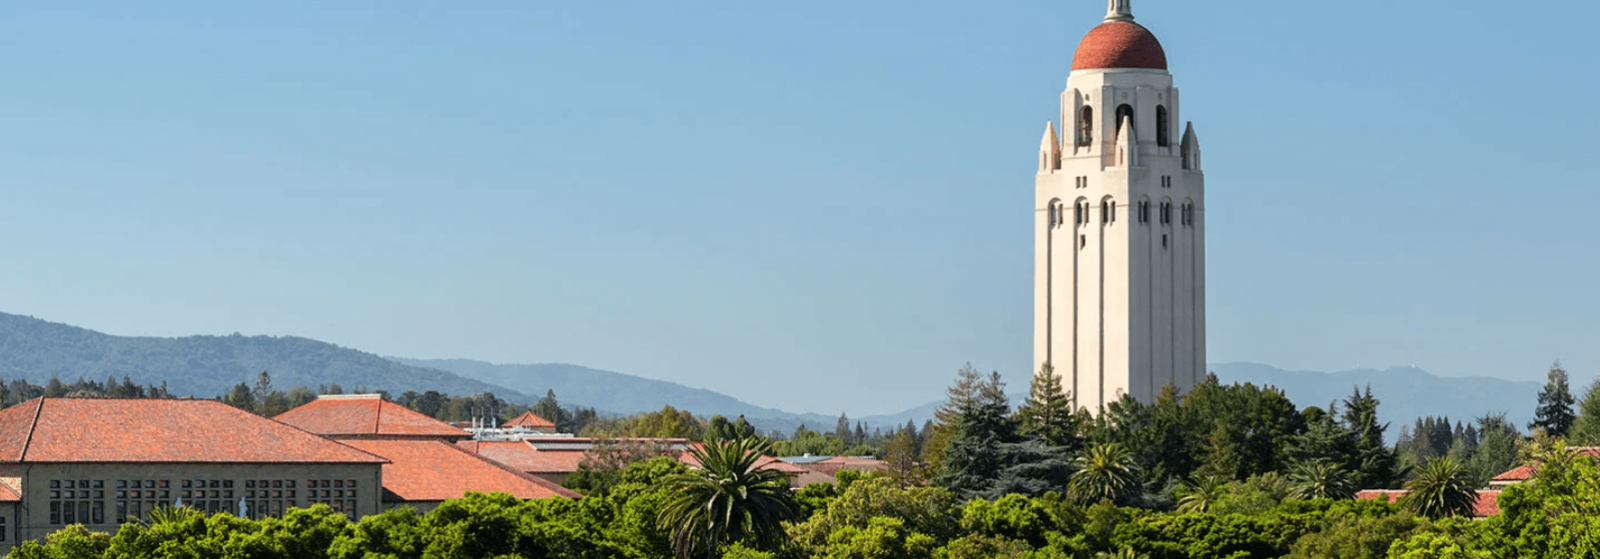

In [ ]:
hoover = cv2.imread('hoover.png')
cv2_imshow(hoover)

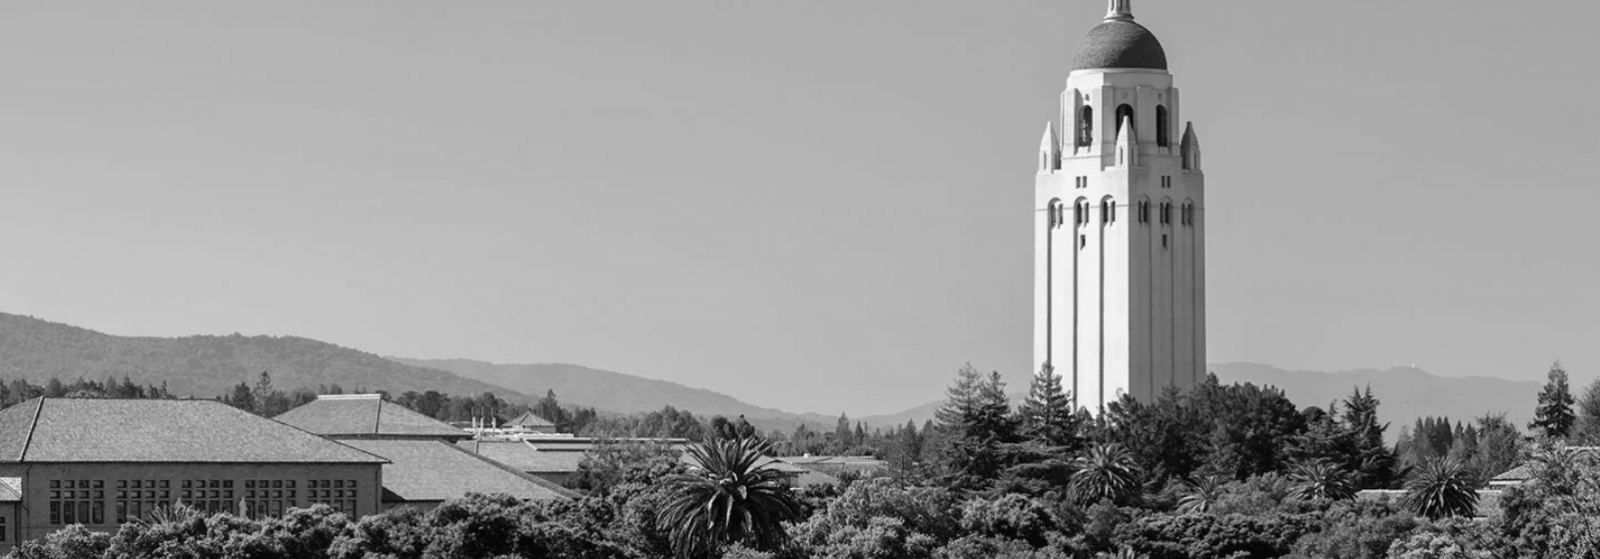

In [ ]:
hoover_bw=cv2.imread('hoover.png',0)
cv2_imshow(hoover_bw)
res_hoover = cv2.resize(hoover_bw, (0,0),fx=0.4,fy=0.4)

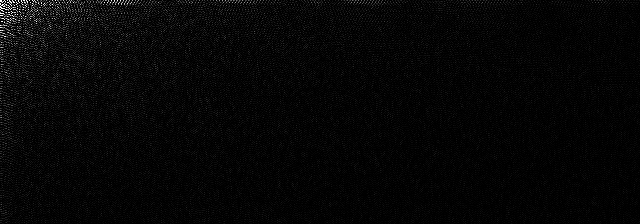

In [ ]:
hoover_float = np.float32(res_hoover)
cosine_hoover = cv2.dct(hoover_float, cv2.DCT_ROWS) #Row-wise application
cv2_imshow(cosine_hoover)

Only these many frequencies (on the boundary) required to make the image. The rest can be removed - Therefore, image can be compressed. (Similar to bitplane slicing)

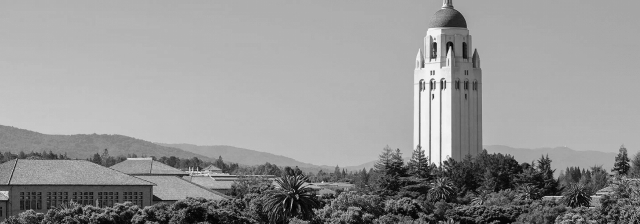

In [ ]:
inverse_hoover = cv2.idct(cosine_hoover)
cv2_imshow(inverse_hoover)

Compression

In [ ]:
cosine_hoover

array([[ 5.6903055e+04,  2.3548835e+03, -2.0557521e+02, ...,
         9.1631927e+00, -1.4623568e+01,  1.7426834e+01],
       [ 1.2231495e+04,  2.8080591e+02,  6.8041908e+01, ...,
        -5.4027977e+00, -4.3028831e+00, -3.8538282e+00],
       [-9.2455391e+03,  1.0092277e+02,  8.1200696e+02, ...,
         5.8743734e+00,  1.4273464e+01, -4.6701207e+00],
       ...,
       [-4.3309528e+01, -4.0613529e+01,  1.9080696e+00, ...,
        -1.1773423e+00, -9.4544382e+00,  1.4905912e+01],
       [ 3.1765625e+01,  2.7748270e+01, -1.5939060e+01, ...,
         4.2274289e+00,  8.4902658e+00, -1.2404117e+01],
       [-1.8738127e+01, -1.0328521e+01,  1.4510588e+01, ...,
        -4.1595268e+00, -7.9042354e+00,  8.6888771e+00]], dtype=float32)

In [ ]:
cosine_hoover.shape

(224, 640)

In [ ]:
comp_hoover = cosine_hoover

In [ ]:
row,col=comp_hoover.shape

Row compression: every row after 25 = 0

In [ ]:
r=50
while(r<row):
  c=0
  while(c<col):
    comp_hoover[r][c] = 0.0
    c+=1
  r+=1

Column compression: every col after 25 = 0

In [ ]:
r=0
while(r<row):
  c=50
  while(c<col):
    comp_hoover[r][c] = 0.0
    c+=1
  r+=1

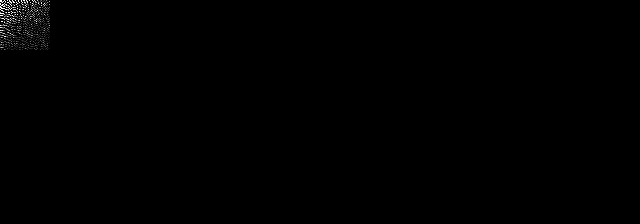

In [ ]:
cv2_imshow(comp_hoover)

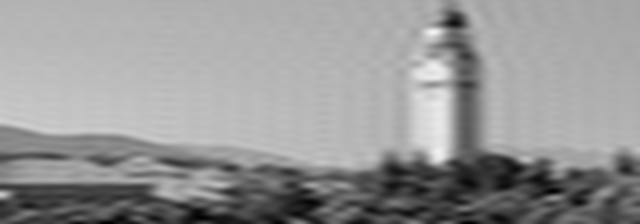

In [ ]:
comp_inv_hoover = cv2.idct(comp_hoover)
cv2_imshow(comp_inv_hoover)

Compression Factor

In [ ]:
non_zero_original = np.count_nonzero(cosine_hoover)
non_zero_compressed = np.count_nonzero(comp_inv_hoover)
compression_factor = non_zero_original / non_zero_compressed
print(f"Compression Factor: {compression_factor}")

Compression Factor: 0.017438616071428572
